# SVM Modeling

## Read Data from Dataset (raw & summary stats)

In [1]:
## %matplotlib inline

import scipy.io as io
import numpy as np
import functions.get_svm as get_svm
import functions.plot as plot

data=io.loadmat('dataset_raw_sumMAT.mat' )
ds = data['ds']

print(len(ds[0,:]))
val=ds[0,0]
print(ds.dtype.names)
print(ds['mean'][0,1].dtype.names)

3720
('vpn', 'session', 'block', 'kat', 'img', 'trailID', 'condition', 'xr', 'xl', 'yr', 'yl', 'dur', 'pupil', 'blink', 'numberOfBlink', 'numberOfFix', 'rating', 'mean', 'std', 'nCat', 'nImg', 'nVpn')
('xr', 'yr', 'xl', 'yl', 'dur', 'pupil')


# Summary SVM
## Split dataset 
- into a feature set X and a target set Y
- clean nan values (remove samples)



In [2]:
#Size of Featurevector
sz=8
# X -> features, y -> label
y =np.zeros((ds.shape[1]))
X =np.zeros((ds.shape[1],sz))

for i in range(0,len(X[:,0]-1)):
    tmp=ds['mean'][0,i]
    X[i, 0]=tmp['xr']
    X[i, 1] = tmp['yr']
    X[i, 2] = tmp['dur']
    X[i, 3] = tmp['pupil']
    X[i, 4] = ds['numberOfFix'][0,i][0][0].astype('int')
    X[i, 5] = ds['numberOfBlink'][0,i][0][0].astype('int')
    X[i, 6]=tmp['xl']
    X[i, 7] = tmp['yl']
    y[i] = ds['nCat'][0,i][0,0].astype(int)

#split datasets
y_p=y[np.where(ds['condition'] == 'perception')[1]]
y_i=y[np.where(ds['condition'] == 'imagination')[1]]
X_p=X[np.where(ds['condition'] == 'perception')[1]]
X_i=X[np.where(ds['condition'] == 'imagination')[1]]


#find nan and exclude
not_excld = np.logical_not((np.any(np.isnan(np.concatenate((X_p,X_i),axis=1)),axis=1)))
print('excluded from perception and imagination: ', np.where(np.logical_not(not_excld)))
print(X_p.shape)
print(y_p.shape)
y_p=y_p[not_excld]
y_i=y_i[not_excld]
X_p=X_p[not_excld]
X_i=X_i[not_excld]
print(X_p.shape)
print(y_p.shape)
print(y_p.astype('int'))

excluded from perception and imagination:  (array([ 572, 1234, 1582, 1585, 1589, 1610, 1619, 1627, 1672, 1718, 1731,
       1753, 1770, 1771, 1772, 1775, 1780, 1783, 1809, 1815, 1833, 1834,
       1842]),)
(1860, 8)
(1860,)
(1837, 8)
(1837,)
[1 1 1 ... 3 3 3]


## perform SVM
by splittin sets into test and training set and do linear SVM

In [3]:
#Set Constant Values
test_train_ratio = 0.7
random_state = 0

In [4]:
#first view SVM with split
accuracy, cm = get_svm.first_view_SVM(X_p,y_p,test_train_ratio=test_train_ratio,random_state=random_state)
print("P->P  ",accuracy, "\n", cm)

accuracy, cm = get_svm.first_view_SVM(X_i,y_i,test_train_ratio=test_train_ratio,random_state=random_state)
print("I->I  ",accuracy, "\n", cm)

accuracy, cm = get_svm.first_view_SVM(X_p,y_p,test_train_ratio=test_train_ratio,random_state=random_state,X_t=X_i,y_t=y_i)
print("I->P  ",accuracy, "\n", cm)


P->P   0.7083981337480559 
 [[280 106  34]
 [151 255  33]
 [ 48   3 376]]
I->I   0.5419906687402799 
 [[231  98  91]
 [147 208  84]
 [117  52 258]]
I->P   0.5068045726728362 
 [[533  33  46]
 [424 139  49]
 [339  15 259]]


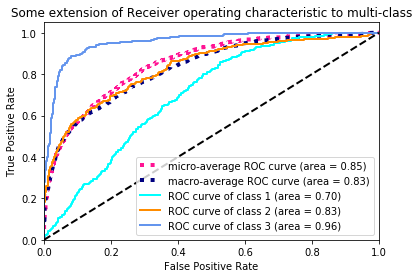

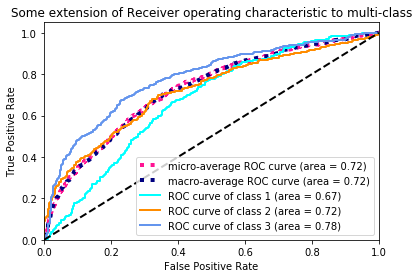

IndexError: too many indices for array

In [8]:

classifier, y_score,y_test,n_classes = get_svm.each_class_CV(
    X_p,y_p,test_train_ratio=test_train_ratio,random_state=random_state)
## %matplotlib inline
plot.each_class_CV(classifier, y_score,y_test, n_classes)

classifier, y_score,y_test,n_classes = get_svm.each_class_CV(
    X_i,y_i,test_train_ratio=test_train_ratio,random_state=random_state)
## %matplotlib inline
plot.each_class_CV(classifier, y_score,y_test, n_classes)

classifier, y_score,y_test,n_classes = get_svm.each_class_CV(
    X_p,y_p,test_train_ratio=test_train_ratio,random_state=random_state,X_t=X_i,y_t=y_i)
## %matplotlib inline
plot.each_class_CV(classifier, y_score,y_test, n_classes)




## Stratified and grouped SVM

In [4]:
classifier, y_score,y_test,n_classes = get_svm.each_class_CV(
    X_p,y_p,test_train_ratio=test_train_ratio,random_state=random_state)
## %matplotlib inline
#plot.each_class_CV(classifier, y_score,y_test, n_classes)
plot.stratifiedCV(X_p, y_p, classifier)

ValueError: multiclass format is not supported

## Permutation testing

Classification score for: p -> p  
 0.6603162241803988 (pvalue : 0.009900990099009901)


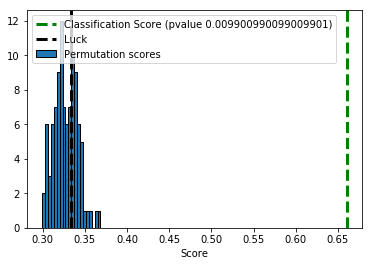

In [6]:
#get Classes
_,n_classes = get_svm.binarize(y_p)

score, permutation_scores, pvalue = get_svm.permutationTesting(
    X_p, y_p, cv=None,n_permutations= 100, random_state = 0)

print("Classification score for: p -> p  \n %s (pvalue : %s)" 
      % (score, pvalue))
## %matplotlib inline
plot.permutation(permutation_scores,score,pvalue,n_classes)


